In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs ## it generate data set 
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [6]:
X, y_true = make_blobs(n_samples=500, centers=3, cluster_std=0.60, random_state=42)

In [7]:
df = pd.DataFrame(X, columns=['Feature_1', 'Feature_2'])

In [8]:
df

,Feature_1,Feature_2
0,-6.190063,-7.302015
1,3.021747,1.940593
2,5.953761,1.488191
3,-2.744463,8.136177
4,5.360607,1.728324
...,...,...
495,-6.040014,-6.325329
496,-2.555459,9.218977
497,4.438408,2.974583
498,-7.193261,-6.250704


In [9]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

In [10]:
inertia = []
K_range = range(1, 11)

In [11]:

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

In [12]:

inertia

[1000.0000000000001,
 297.8954141051722,
 11.575484723104982,
 9.752067977356843,
 8.25717527244628,
 6.917577320416798,
 6.334755391595288,
 5.704177177901429,
 5.060234133532076,
 4.762361898130397]

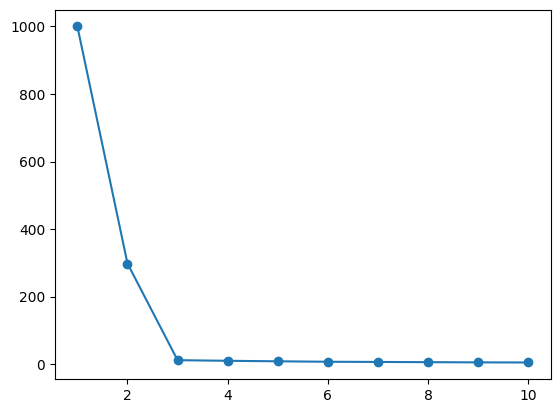

In [13]:
plt.plot(K_range, inertia, marker='o')

In [14]:

kmeans_final = KMeans(n_clusters=3, random_state=42)

In [15]:
cluster_labels = kmeans_final.fit_predict(X_scaled)

In [16]:

df['cluster'] = cluster_labels

<Axes: xlabel='Feature_1', ylabel='Feature_2'>

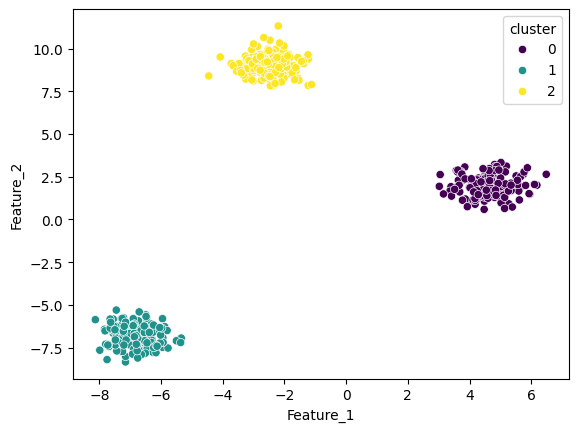

In [17]:

sns.scatterplot(x=df['Feature_1'],
                y=df['Feature_2'],
                hue=df['cluster'],
                palette='viridis')

In [18]:

from sklearn.datasets import make_moons

In [19]:
X, y_true = make_moons(n_samples=500, noise=0.05, random_state=42)

In [20]:
from sklearn.cluster import KMeans, DBSCAN

In [21]:
df = pd.DataFrame(X, columns=['Feature_1', 'Feature_2'])

In [22]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

In [23]:

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

In [24]:

df['kmeans_cluster'] = kmeans_labels

<Axes: xlabel='Feature_1', ylabel='Feature_2'>

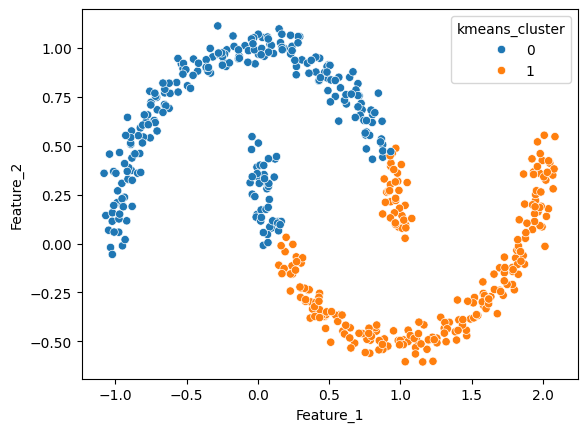

In [25]:
sns.scatterplot(x=df['Feature_1'], y=df['Feature_2'], hue=df['kmeans_cluster'], palette='tab10')

In [26]:
dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

In [27]:

df['dbscan_cluster'] = dbscan_labels

<Axes: xlabel='Feature_1', ylabel='Feature_2'>

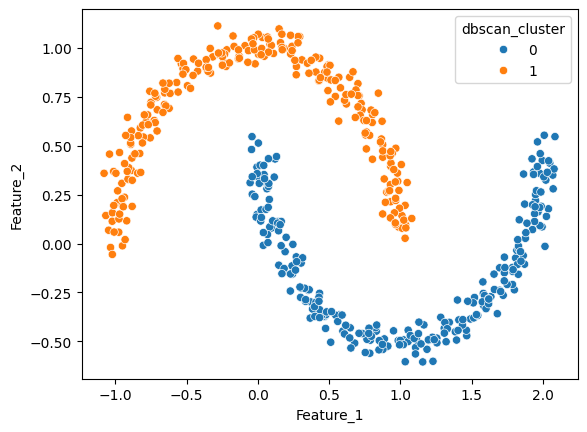

In [28]:
sns.scatterplot(x=df['Feature_1'], y=df['Feature_2'], hue=df['dbscan_cluster'], palette='tab10')
